In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
data = pd.read_csv('D:/Dev/News_Sentiment/xdata/data.csv')
data_rate = pd.read_csv('D:/Dev/News_Sentiment/xdata/rating.csv')
traffic = pd.read_csv('D:/Dev/News_Sentiment/xdata/traffic.csv')
domain_location = pd.read_csv('D:/Dev/News_Sentiment/xdata/domains_location.csv')

In [5]:
data.columns

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'full_content'],
      dtype='object')

In [6]:
data_rate.columns

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment'],
      dtype='object')

In [7]:
data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN


In [8]:
data_rate.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105375 non-null  int64 
 1   source_id     24495 non-null   object
 2   source_name   105375 non-null  object
 3   author        97156 non-null   object
 4   title         105335 non-null  object
 5   description   104992 non-null  object
 6   url           105375 non-null  object
 7   url_to_image  99751 non-null   object
 8   published_at  105375 non-null  object
 9   content       105375 non-null  object
 10  category      105333 non-null  object
 11  full_content  58432 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.6+ MB


In [10]:
data_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB


In [11]:
data.describe(include='all')

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
count,105375.000000,24495,105375,97156,105335,104992,105375,99751,105375,105375,105333,58432
unique,NaN,61,2379,20575,98304,98488,101832,75167,80508,97185,257,54143
top,NaN,the-times-of-india,ETF Daily News,MarketBeat News,Morning news brief,No description,https://www.globenewswire.com/news-release/202...,https://cdn08.allafrica.com/static/images/stru...,2023-11-08 10:05:18,When browsing with ads:\nWe collect personal d...,Stock,Attachment
freq,NaN,7629,16631,16627,17,615,2,1031,122,176,3999,9
mean,195044.072987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,199819.981007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,363.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,50405.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,108862.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,284507.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The top and bottom 10 websites that have the largest count of news articles

In [12]:
source_counts = data["source_name"].value_counts()
top10_websites = source_counts.head(10)
print("Top 10 website with the largest articles", top10_websites)
bottom10_websites = source_counts.tail(10)
print("Bottom 10 website with the largest articles", bottom10_websites)

Top 10 website with the largest articles source_name
ETF Daily News        16631
The Times of India     7629
GlobeNewswire          5485
Forbes                 4423
Biztoc.com             3968
BBC News               3342
Globalsecurity.org     3093
Business Insider       2746
ABC News               2188
Marketscreener.com     1948
Name: count, dtype: int64
Bottom 10 website with the largest articles source_name
Influxdata.com          1
Without.boats           1
Nota-lang.org           1
Koyeb.com               1
UW News                 1
Knowablemagazine.org    1
News.rub.de             1
Robertovitillo.com      1
Signoz.io               1
Omnigroup.com           1
Name: count, dtype: int64


C:\Users\Befikadu Chuchu Sata\AppData\Local\Temp\ipykernel_4992\4070830664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_websites.values, y=top10_websites.index, palette="viridis")


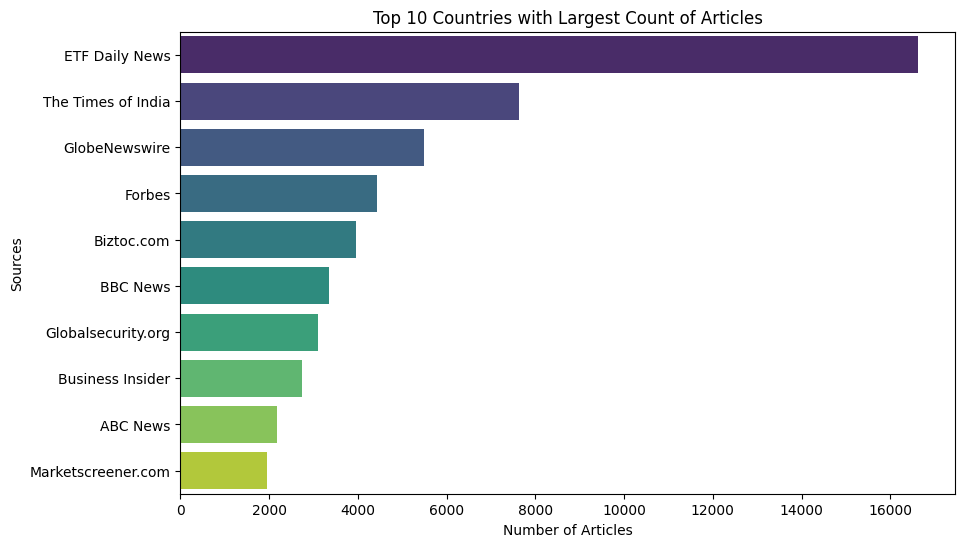

C:\Users\Befikadu Chuchu Sata\AppData\Local\Temp\ipykernel_4992\4070830664.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom10_websites.values, y=bottom10_websites.index, palette="viridis")


<function matplotlib.pyplot.show(close=None, block=None)>

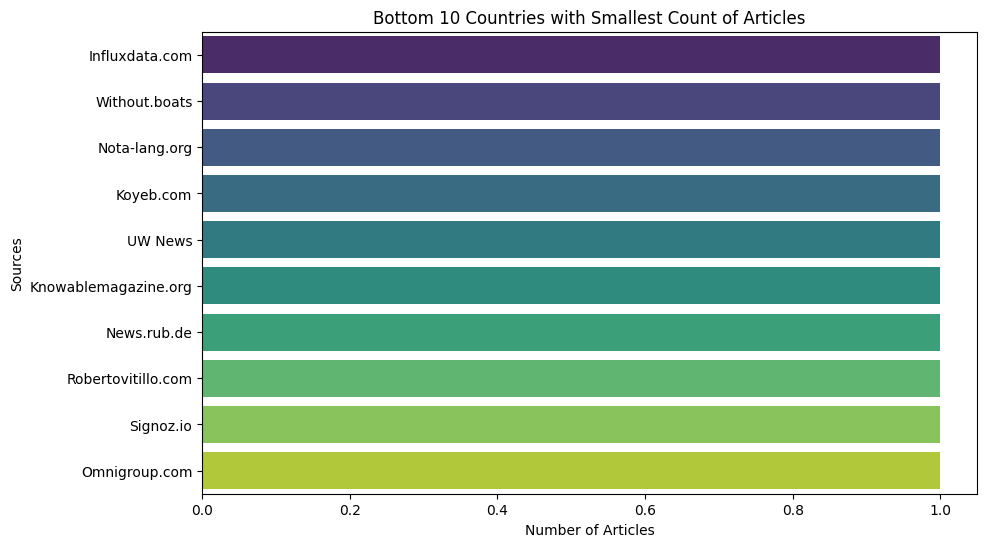

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=top10_websites.values, y=top10_websites.index, palette="viridis")
plt.title('Top 10 Countries with Largest Count of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Sources')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=bottom10_websites.values, y=bottom10_websites.index, palette="viridis")
plt.title('Bottom 10 Countries with Smallest Count of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Sources')
plt.show

The Top 10 Websites with the highest numbers of visitors traffic.

In [14]:
sorted_traffic = traffic.sort_values(by='GlobalRank', ascending=False)
top10_traffic = sorted_traffic.head(10)
print("Top 10 websites with the highest numbers of visitors traffic:\n", top10_traffic)

Top 10 websites with the highest numbers of visitors traffic:
         GlobalRank  TldRank                  Domain  TLD  RefSubNets  RefIPs  \
999999     1000000   485328  toyotamusicfactory.com  com         222     280   
999998      999999   485327          soderhomes.com  com         222     280   
999997      999998   485326           pinkwater.com  com         222     280   
999996      999997   485325             mt-lock.com  com         222     280   
999995      999996   485324              kireie.com  com         222     280   
999994      999995   485323         keith-baker.com  com         222     280   
999993      999994   485322          irishcycle.com  com         222     280   
999992      999993   485321                hmag.com  com         222     280   
999991      999992   485320    exploring-africa.com  com         222     280   
999990      999991   485319            eiretrip.com  com         222     280   

                    IDN_Domain IDN_TLD  PrevGlobalRank  

C:\Users\Befikadu Chuchu Sata\AppData\Local\Temp\ipykernel_4992\2423415006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_traffic['GlobalRank'], y=top10_traffic['Domain'], palette='viridis')


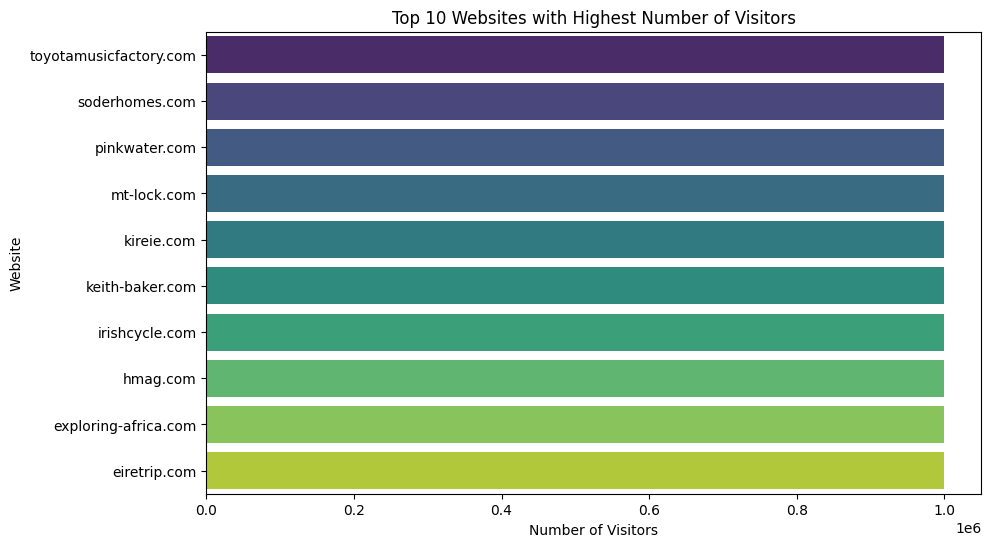

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_traffic['GlobalRank'], y=top10_traffic['Domain'], palette='viridis')
plt.title('Top 10 Websites with Highest Number of Visitors')
plt.xlabel('Number of Visitors')
plt.ylabel('Website')
plt.show()

Countries with most news media

In [16]:
country_count = domain_location['Country'].value_counts()
top10_countries = country_count.head(10)
print(top10_countries)

Country
United States     14111
United Kingdom     1950
Italy              1810
France             1041
Russia             1024
Canada              887
Germany             884
China               780
Turkey              725
India               686
Name: count, dtype: int64


Top countries and regions that have many articles written about them - the content of the news is about that country

In [17]:
# Define countries
countries = [
    'Africa', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Chad', 'Congo', 'Congo, The Democratic Republic of the', "Côte d'Ivoire", 'Djibouti', 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Kenya', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',  'Monaco', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Papua New Guinea', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe',
    'United States', 'Virgin Islands, U.S.',
    'China', 'Hong Kong',
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belgium', 'Bulgaria', 'Croatia',  'Cyprus', 'Denmark', 'Estonia', 'Europe', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Martinique', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'San Marino', 'Serbia', 'Seychelles', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
    'Russia', 'Russian Federation',
    'Ukraine',
    'Afghanistan', 'Bahrain', 'Belarus', 'Iran Islamic Republic of', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Pakistan', 'Palestine, State of', 'Qatar', 'Romania', 'Saudi Arabia', 'United Arab Emirates', 'Yemen'
]

In [18]:
def count_country_mentions(text, countries):
    mentions = Counter()
    for country in countries:
        if pd.notna(text):
            mentions[country] += text.lower().count(country.lower())
    return mentions

In [21]:
# Apply the function to the 'content' field
country_mentions = Counter()
for content in data['content']:
    country_mentions.update(count_country_mentions(content, countries))

# Convert the Counter object to a DataFrame for better readability
country_mentions_df = pd.DataFrame.from_dict(country_mentions, orient='index', columns=['mentions']).reset_index()
country_mentions_df = country_mentions_df.rename(columns={'index': 'country'})

# Sort the data by the number of mentions in descending order
sorted_country_mentions = country_mentions_df.sort_values(by='mentions', ascending=False)

# Display the top countries with the highest number of mentions
top_country_mentions = sorted_country_mentions.head(10)
print("Top Countries with the highest number of articles written about them:\n", top_country_mentions)

Top Countries with the highest number of articles written about them:
            country  mentions
101         Israel      5197
93          Russia      2540
62          Europe      2275
49           China      2080
0           Africa      1744
47   United States      1658
95         Ukraine      1525
33           Niger      1221
105           Oman      1106
34         Nigeria       979


In [22]:
# Define regions
regions = {
    'Africa': ['Africa', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Chad', 'Congo', 'Congo, The Democratic Republic of the', "Côte d'Ivoire", 'Djibouti', 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Kenya', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',  'Monaco', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Papua New Guinea', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'US': ['United States', 'Virgin Islands, U.S.'],
    'China': ['China', 'Hong Kong'],
    'EU': ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belgium', 'Bulgaria', 'Croatia',  'Cyprus', 'Denmark', 'Estonia', 'Europe', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Martinique', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'San Marino', 'Serbia', 'Seychelles', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
    'Russia': ['Russia', 'Russian Federation'],
    'Ukraine': ['Ukraine'],
    'Middle East': ['Afghanistan', 'Bahrain', 'Belarus', 'Iran Islamic Republic of', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Pakistan', 'Palestine, State of', 'Qatar', 'Romania', 'Saudi Arabia', 'United Arab Emirates', 'Yemen']
}

In [23]:
def count_region_mentions(text, regions):
    region_mentions = Counter()
    for region, countries in regions.items():
        for country in countries:
            if pd.notna(text):
                region_mentions[region] += text.lower().count(country.lower())
    return region_mentions

In [24]:
region_mentions = Counter()
for content in data['category']:
    region_mentions.update(count_region_mentions(content, regions))

In [25]:
region_mentions_df = pd.DataFrame.from_dict(region_mentions, orient='index', columns=['mentions']).reset_index()
region_mentions_df = region_mentions_df.rename(columns={'index': 'region'})

# Sort the data by the number of mentions in descending order
sorted_region_mentions = region_mentions_df.sort_values(by='mentions', ascending=False)

# Display the top regions with the highest number of mentions
top_region_mentions = sorted_region_mentions.head(10)
print("Top Regions with the highest number of articles written about them:\n", top_region_mentions)

Top Regions with the highest number of articles written about them:
         region  mentions
0       Africa     10470
3           EU      9355
6  Middle East      4269
2        China      1121
1           US       871
4       Russia       692
5      Ukraine       631


Websites that reported on the given regions

In [26]:
def categorize_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return 'Other'

In [27]:
data['region'] = data['category'].apply(categorize_region)
specified_regions = ['Africa', 'US', 'China', 'EU', 'Russia', 'Ukraine', 'Middle East']
filter_by_region = data[data['region'].isin(specified_regions)]
counts_by_region = filter_by_region['source_name'].value_counts()
top10_counts_by_region = counts_by_region.head(10)
print("Top 10 websites reporting on specified regions:\n", top10_counts_by_region)

Top 10 websites reporting on specified regions:
 source_name
ETF Daily News                 2595
Globalsecurity.org             1420
Biztoc.com                     1122
BBC News                       1095
GlobeNewswire                  1007
The Times of India              973
AllAfrica - Top Africa News     960
The Punch                       951
Al Jazeera English              697
Marketscreener.com              650
Name: count, dtype: int64
